# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [103]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


In [2]:
#print (weather_api_key)

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
print (cities)

Number of cities in the list: 602
['utrik', 'cuajinicuilapa', 'waitangi', 'isangel', 'lata', 'borba', 'santo antonio do ica', 'nyurba', 'taiohae', 'gannan', 'puerto natales', 'kodiak', 'wailua homesteads', 'basco', 'blackmans bay', 'ginir', 'khandyga', 'invercargill', 'olonkinbyen', 'borogontsy', 'vila franca do campo', 'bilibino', 'bredasdorp', 'wabag', 'port-aux-francais', 'puerto ayora', 'uturoa', 'lib', 'ceska trebova', 'tazovsky', 'greymouth', 'san patricio', "st. john's", 'kasane', 'acarau', 'kerikeri', 'margaret river', "nar'yan-mar", 'el calafate', 'port mathurin', 'ushuaia', 'bethel', 'fale old settlement', 'iqaluit', 'ancud', 'isafjordur', 'castillos', 'al bawiti', 'hadibu', 'edinburgh of the seven seas', 'krasnyy kut', 'bubaque', 'port elizabeth', 'mar del plata', 'riohacha', 'karratha', 'cargados carajos', 'grytviken', 'iquitos', 'jamestown', 'arteche', 'yellowknife', 'novozybkov', 'sainyabuli', 'prince rupert', "hayma'", 'tsiombe', 'ilulissat', 'puerto san jose', 'itaguai'

In [27]:
#Test
city_min= cities [:20]
print (city_min)

['utrik', 'cuajinicuilapa', 'waitangi', 'isangel', 'lata', 'borba', 'santo antonio do ica', 'nyurba', 'taiohae', 'gannan', 'puerto natales', 'kodiak', 'wailua homesteads', 'basco', 'blackmans bay', 'ginir', 'khandyga', 'invercargill', 'olonkinbyen', 'borogontsy']


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [33]:

# Set the API base URL
url = 'http://api.openweathermap.org/data/2.5/weather'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    
    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        city_weather=requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather ["coord"]["lat"]
        city_lng = city_weather ["coord"]["lon"]
        city_max_temp_k = city_weather ["main"]["temp_max"]
        city_max_temp = city_max_temp_k - 273.15
        city_humidity = city_weather ["main"]["humidity"]
        city_clouds = city_weather ["clouds"]["all"]
        city_wind = city_weather ["wind"]["speed"]
        city_country = city_weather ["sys"]["country"]
        city_date = city_weather ["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
                         })

    # If an error is experienced, skip the city

    except:
        print("City not found. Skipping...")
        pass
 #print (city_lat)             
 #Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | utrik
Processing Record 2 of Set 1 | cuajinicuilapa
Processing Record 3 of Set 1 | waitangi
Processing Record 4 of Set 1 | isangel
Processing Record 5 of Set 1 | lata
Processing Record 6 of Set 1 | borba
Processing Record 7 of Set 1 | santo antonio do ica
Processing Record 8 of Set 1 | nyurba
Processing Record 9 of Set 1 | taiohae
City not found. Skipping...
Processing Record 10 of Set 1 | gannan
Processing Record 11 of Set 1 | puerto natales
Processing Record 12 of Set 1 | kodiak
Processing Record 13 of Set 1 | wailua homesteads
Processing Record 14 of Set 1 | basco
Processing Record 15 of Set 1 | blackmans bay
Processing Record 16 of Set 1 | ginir
Processing Record 17 of Set 1 | khandyga
Processing Record 18 of Set 1 | invercargill
Processing Record 19 of Set 1 | olonkinbyen
Processing Record 20 of Set 1 | borogontsy
Processing Record 21 of Set 1 | vila franca do campo
Processing Record 22 of S

In [23]:
# for printing the head
#For check row [0]
#city_weather = []
#try:
    #city_weather.append (requests.get(city_url).json())
#except KeyError:
    #print ("not city found")
#print (city_weather [0])

In [34]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame (city_data)

# Show Record Count|
city_data_df.count()

City          576
Lat           576
Lng           576
Max Temp      576
Humidity      576
Cloudiness    576
Wind Speed    576
Country       576
Date          576
dtype: int64

In [35]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,utrik,11.2278,169.8474,27.55,82,87,10.19,MH,1691360073
1,cuajinicuilapa,16.4667,-98.4167,32.48,56,91,4.45,MX,1691360073
2,waitangi,-43.9535,-176.5597,7.68,89,100,0.45,NZ,1691360073
3,isangel,-19.5500,169.2667,24.06,69,40,2.06,VU,1691360073
4,lata,40.1629,-8.3327,21.71,46,0,0.81,PT,1691360074


In [36]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [37]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,utrik,11.2278,169.8474,27.55,82,87,10.19,MH,1691360073
1,cuajinicuilapa,16.4667,-98.4167,32.48,56,91,4.45,MX,1691360073
2,waitangi,-43.9535,-176.5597,7.68,89,100,0.45,NZ,1691360073
3,isangel,-19.5500,169.2667,24.06,69,40,2.06,VU,1691360073
4,lata,40.1629,-8.3327,21.71,46,0,0.81,PT,1691360074


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

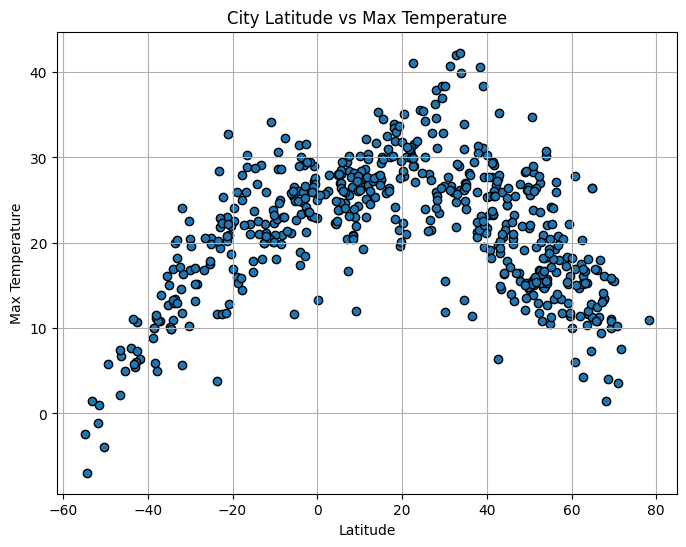

In [129]:
# Build scatter plot for latitude vs. temperature
city_data_df
latitudes = city_data_df ["Lat"]
temp = city_data_df ["Max Temp"]
plt.figure (figsize =(8,6))
plt.scatter (latitudes, temp, marker = "o", edgecolors= "black")
# Incorporate the other graph properties
plt.title ("City Latitude vs Max Temperature")
plt.xlabel ("Latitude")
plt.ylabel ("Max Temperature")
plt.grid (True)


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

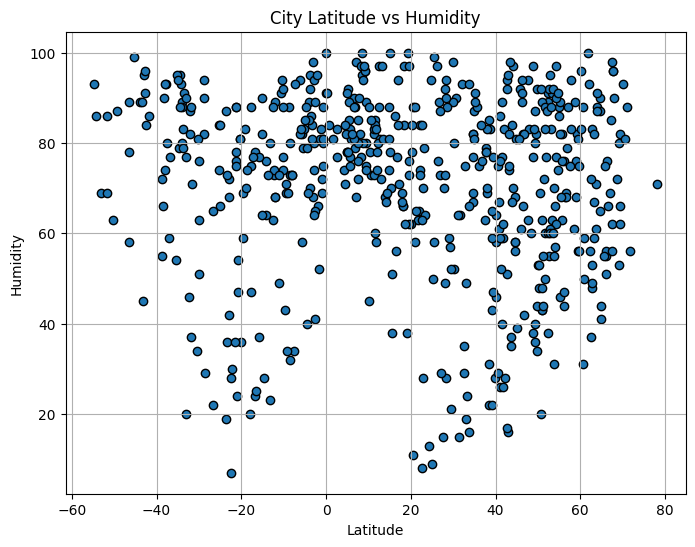

In [130]:
# Build the scatter plots for latitude vs. humidity
city_data_df
latitudes = city_data_df ["Lat"]
humidity = city_data_df ["Humidity"]
plt.figure (figsize =(8,6))
plt.scatter (latitudes, humidity, marker = "o", edgecolors= "black")
# Incorporate the other graph properties
plt.title ("City Latitude vs Humidity")
plt.xlabel ("Latitude")
plt.ylabel ("Humidity")
plt.grid (True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

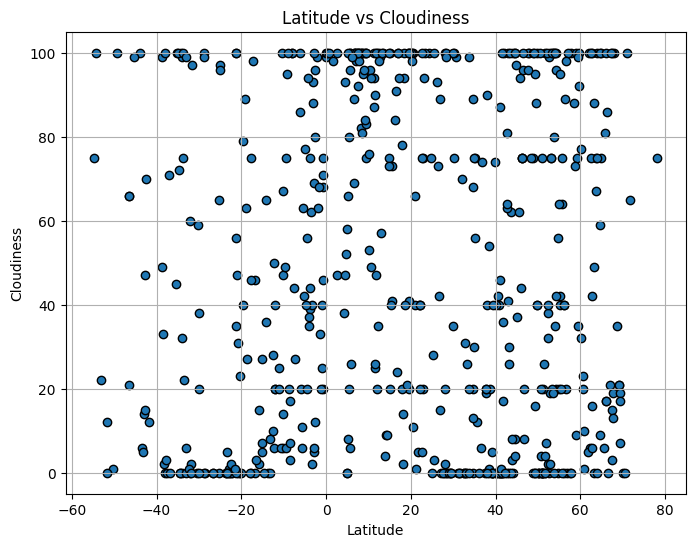

In [131]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df
latitudes =city_data_df ["Lat"]
cloudiness = city_data_df ["Cloudiness"]
plt.figure (figsize =(8,6))
plt.scatter (latitudes,cloudiness, marker= "o", edgecolors = "black")
# Incorporate the other graph properties
plt.title ("Latitude vs Cloudiness")
plt. xlabel ("Latitude")
plt.ylabel ("Cloudiness")
plt.grid (True)
# Save the figure
plt.savefig ("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

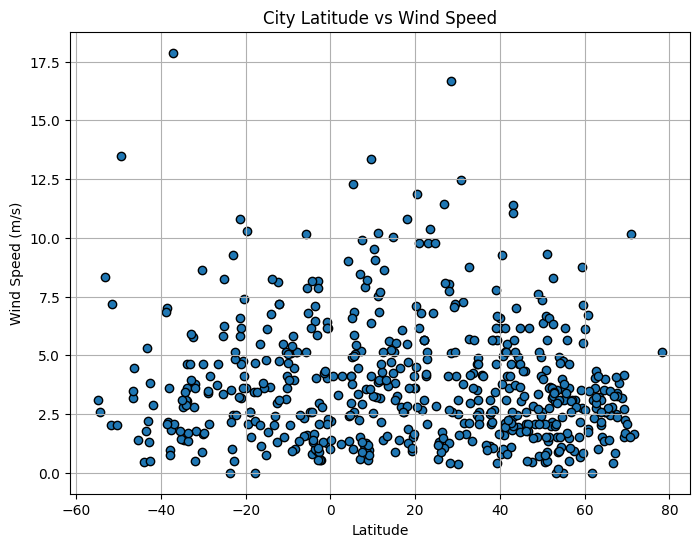

In [132]:
# Build the scatter plots for latitude vs. wind speed
city_data_df
latitudes =city_data_df ["Lat"]
wind = city_data_df ["Wind Speed"]
plt.figure (figsize = (8,6))
plt.scatter (latitudes,wind, marker="o", edgecolors ="black")

# Incorporate the other graph properties
plt.title ("City Latitude vs Wind Speed")
plt.xlabel ("Latitude")
plt.ylabel ("Wind Speed (m/s)")
plt.grid (True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [110]:
# Define a function to create Linear Regression plots

def  linear_regression (x_values, y_values):
     correlation = st.pearsonr (x_values, y_values)
     (slope, intercept,rvalue, pvalue, stderr)= linregress(x_values,y_values)
     regres_values = x_values * slope + intercept
     line_eq = 'y=' +str (round(slope,2)) + 'x +' + str (round(intercept,2))
     plt.scatter (x_values,y_values)
     plt.plot (x_values,regres_values, "r-")
     print (f"The correlation between both factors is {round(correlation[0],1)}")

In [133]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc [(city_data_df["Lat"]>=0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,utrik,11.2278,169.8474,27.55,82,87,10.19,MH,1691360073
1,cuajinicuilapa,16.4667,-98.4167,32.48,56,91,4.45,MX,1691360073
4,lata,40.1629,-8.3327,21.71,46,0,0.81,PT,1691360074
7,nyurba,63.2842,118.3319,15.29,67,88,3.24,RU,1691360074
8,gannan,47.9147,123.5031,15.55,83,100,2.82,CN,1691360074


In [134]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc [(city_data_df["Lat"]<0)]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,waitangi,-43.9535,-176.5597,7.68,89,100,0.45,NZ,1691360073
3,isangel,-19.5500,169.2667,24.06,69,40,2.06,VU,1691360073
5,borba,-4.3878,-59.5939,31.47,40,56,0.79,BR,1691359357
6,santo antonio do ica,-3.1022,-67.9397,29.10,68,93,0.94,BR,1691360074
9,puerto natales,-51.7236,-72.4875,-1.15,86,12,2.04,CL,1691360075


###  Temperature vs. Latitude Linear Regression Plot

The correlation between both factors is -0.6


Text(0, 0.5, 'Max Temp')

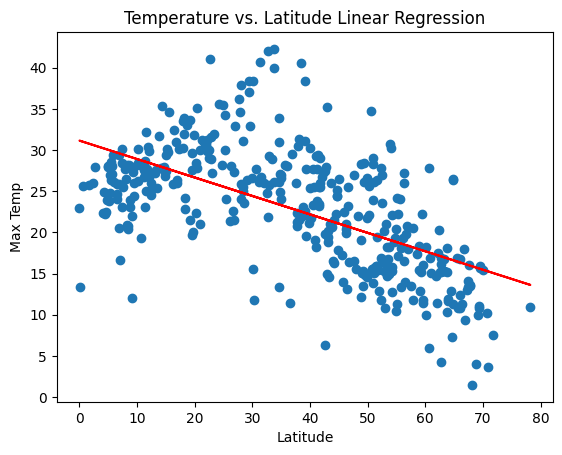

In [135]:
# Linear regression on Northern Hemisphere
x_values= northern_hemi_df ["Lat"] 
y_values= northern_hemi_df ["Max Temp"]
linear_regression (x_values, y_values)
plt.title ("Temperature vs. Latitude Linear Regression")
plt.xlabel ("Latitude")
plt.ylabel ("Max Temp")

The correlation between both factors is 0.8


Text(0, 0.5, 'Max Temp')

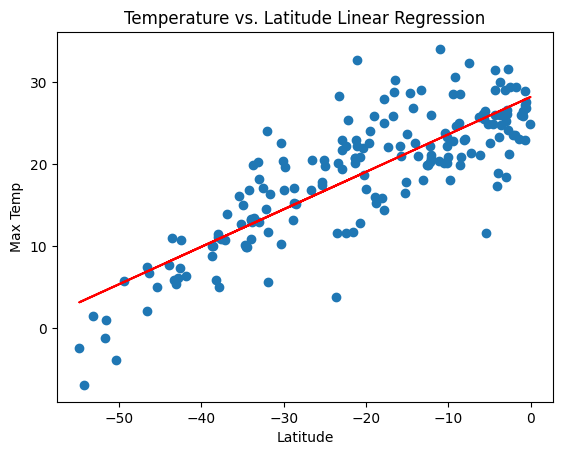

In [136]:
# Linear regression on Southern Hemisphere
x_values= southern_hemi_df ["Lat"] 
y_values= southern_hemi_df ["Max Temp"]
linear_regression (x_values, y_values)
plt.title ("Temperature vs. Latitude Linear Regression")
plt.xlabel ("Latitude")
plt.ylabel ("Max Temp")

**Discussion about the linear relationship:** 
In the northern hemisphere, with a coefficient of -0.6, it indicates a negative correlation between temperature and latitude. This means that temperatures increase as the latitude gets closer to the equator. In the southern hemisphere, the correlation is 0.8, which is strong, and this means that temperatures increase as the latitude decreases and gets closer to the equator. Therefore, we can conclude that the distance from the equator has a significant relationship with warmer temperatures.

### Humidity vs. Latitude Linear Regression Plot

The correlation between both factors is -0.2


Text(0, 0.5, 'Humidity')

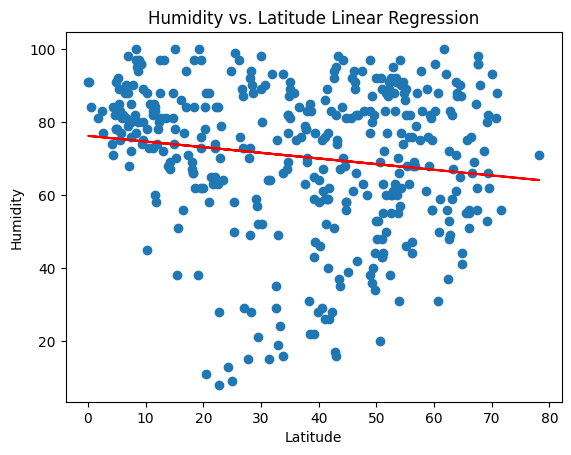

In [137]:
# Northern Hemisphere
x_values= northern_hemi_df ["Lat"] 
y_values= northern_hemi_df ["Humidity"]
linear_regression (x_values, y_values)
plt.title ("Humidity vs. Latitude Linear Regression")
plt.xlabel ("Latitude")
plt.ylabel ("Humidity")

The correlation between both factors is -0.0


Text(0, 0.5, 'Humidity')

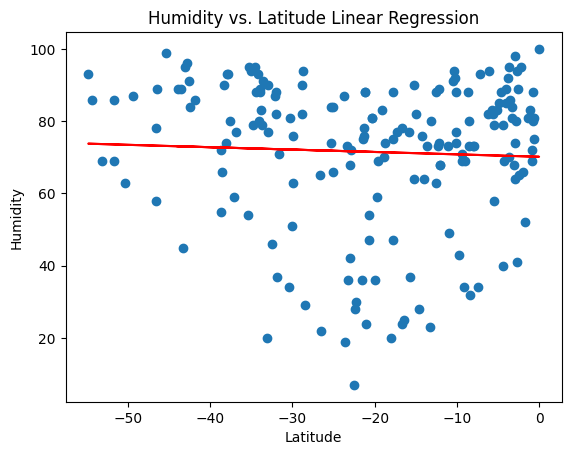

In [138]:
# Southern Hemisphere
x_values= southern_hemi_df ["Lat"] 
y_values= southern_hemi_df ["Humidity"]
linear_regression (x_values, y_values)
plt.title ("Humidity vs. Latitude Linear Regression")
plt.xlabel ("Latitude")
plt.ylabel ("Humidity")

**Discussion about the linear relationship:** Y
The correlation between humidity and latitude does not exist. With correlations of -0.2 for the Northern Pole and 0.0 for the Southern Pole, we can conclude that there is no relationship between humidity and latitude in either pole.

### Cloudiness vs. Latitude Linear Regression Plot

The correlation between both factors is -0.2


Text(0, 0.5, 'Cloudiness')

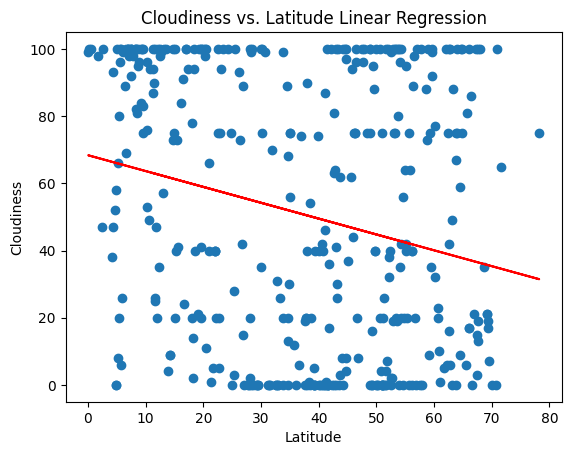

In [139]:
# Northern Hemisphere
x_values= northern_hemi_df ["Lat"] 
y_values= northern_hemi_df ["Cloudiness"]
linear_regression (x_values, y_values)
plt.title ("Cloudiness vs. Latitude Linear Regression")
plt.xlabel ("Latitude")
plt.ylabel ("Cloudiness")

The correlation between both factors is 0.1


Text(0, 0.5, 'Cloudiness')

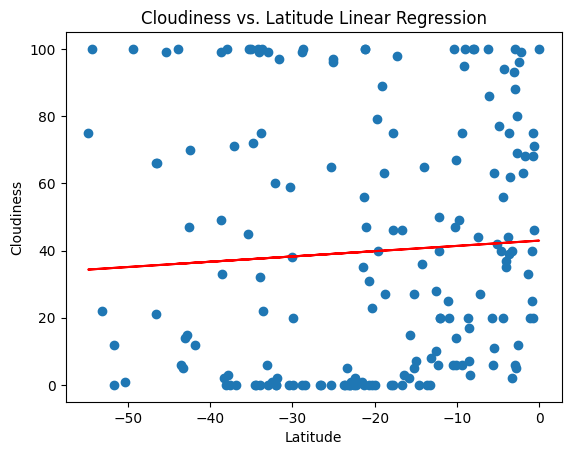

In [140]:
# Southern Hemisphere
x_values= southern_hemi_df ["Lat"] 
y_values= southern_hemi_df ["Cloudiness"]
linear_regression (x_values, y_values)
plt.title ("Cloudiness vs. Latitude Linear Regression")
plt.xlabel ("Latitude")
plt.ylabel ("Cloudiness")

**Discussion about the linear relationship:** 
The relationship between cloudiness and latitude does not exist. With a correlation of -0.2 for the Northern Pole and 0.1 for the Southern Pole, we can conclude that these variables are not related.

### Wind Speed vs. Latitude Linear Regression Plot

The correlation between both factors is -0.2


Text(0, 0.5, 'Wind Speed')

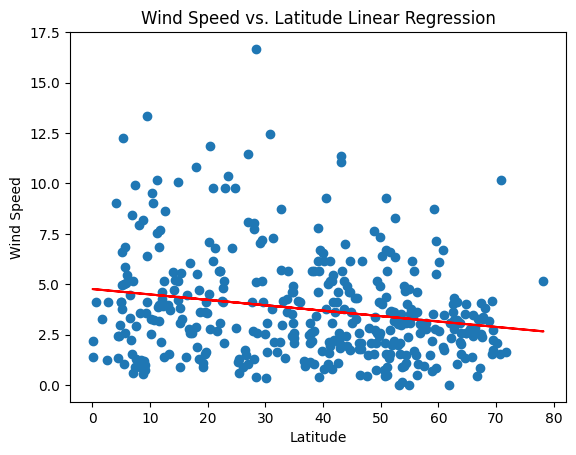

In [141]:
# Northern Hemisphere
x_values= northern_hemi_df ["Lat"] 
y_values= northern_hemi_df ["Wind Speed"]
linear_regression (x_values, y_values)
plt.title ("Wind Speed vs. Latitude Linear Regression")
plt.xlabel ("Latitude")
plt.ylabel ("Wind Speed")

The correlation between both factors is -0.0


Text(0, 0.5, 'Wind Speed')

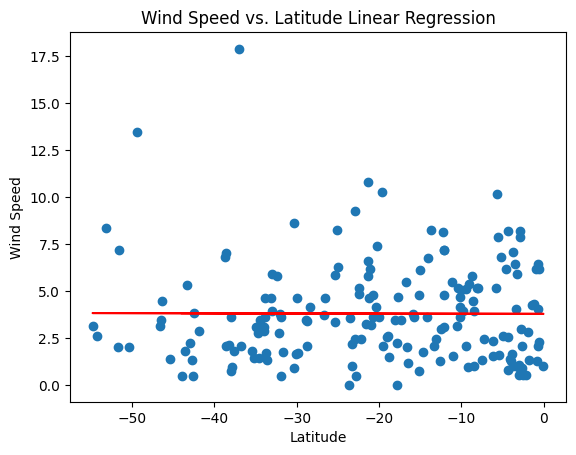

In [142]:
# Southern Hemisphere
x_values= southern_hemi_df ["Lat"] 
y_values= southern_hemi_df ["Wind Speed"]
linear_regression (x_values, y_values)
plt.title ("Wind Speed vs. Latitude Linear Regression")
plt.xlabel ("Latitude")
plt.ylabel ("Wind Speed")

**Discussion about the linear relationship:** 
Similar to the previous instances, there is no connection between wind speed and latitude. The correlation coefficients, being -0.2 for the Northern Pole and 0.1 for the Southern Pole, these variables do not share any meaningful relationship.